In [1]:
# basics
import pandas as pd 
import numpy as np
import os 
import re
from datetime import datetime
from tqdm.notebook import tqdm
tqdm.pandas()
import requests
import urllib

# plotting
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import plotly.express as px
import seaborn as sns

# modeling
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)

In [2]:
# local or gdrive
path_source = 'local2'

if path_source == 'gdrive':
  from google.colab import drive
  drive.mount('/content/gdrive')
  data_path = '/content/gdrive/MyDrive/Classes/W210_capstone/W210_Capstone/Data/joined_data'
  #env_path = '/content/gdrive/MyDrive/.env'
  
elif path_source == 'local':
  data_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone/W210_Capstone/Data/joined_data'
  #env_path = '/content/gdrive/MyDrive/.env'

elif path_source == 'local2':
  data_path = '/data/joined_data'
  #env_path = '/content/gdrive/MyDrive/.env'

In [3]:
  
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
   
current_path()
   
os.chdir('../')
   
current_path()

Current working directory before
c:\Users\anandadmin\Documents\ML_MS\UCB\2022_Fall\W210\JLPS_capstone_project\modeling

Current working directory before
c:\Users\anandadmin\Documents\ML_MS\UCB\2022_Fall\W210\JLPS_capstone_project



In [4]:
os.getcwd()

'c:\\Users\\anandadmin\\Documents\\ML_MS\\UCB\\2022_Fall\\W210\\JLPS_capstone_project'

In [5]:
# load full dataset
df = pd.read_parquet('data\joined_data\joined_open_schools_only_10-10-22.parquet')

In [6]:
df.head()

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.264870,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2358.38241919395,-37.54028477906731,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
3,2010.0,20651930113076,Madera,93610,2007-08-21,2025-01-01,37.131113,-120.242025,1.531352,77.12,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2892.9075458251764,11.831222108044384,NaN,NaN,1.531352,102.528057,102.528057,90.696835,90.696835,1.531352,90.696835,0.987838,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
4,2010.0,20651936023907,Madera,93610,1980-07-01,2025-01-01,37.115243,-120.267770,1.531352,70.66,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2004.5665433091058,-57.72695665034661,NaN,NaN,1.531352,102.528057,102.528057,160.255014,160.255014,1.531352,160.255014,0.058794,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1


In [7]:
df.shape

(2471552, 56)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471552 entries, 0 to 2983110
Data columns (total 56 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   year                       float64       
 1   cdscode                    int64         
 2   school_county              object        
 3   school_zip                 int32         
 4   school_open_date           datetime64[ns]
 5   school_closed_date         datetime64[ns]
 6   school_lat                 float64       
 7   school_lon                 float64       
 8   school_wspd                float64       
 9   school_elevation_m         float64       
 10  year_month                 datetime64[ns]
 11  total_population           object        
 12  total_population_male      object        
 13  total_population_female    object        
 14  population_0_4             object        
 15  population_0_4_male        object        
 16  population_0_4_female      object   

In [9]:
df.head()

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.264870,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2358.38241919395,-37.54028477906731,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
3,2010.0,20651930113076,Madera,93610,2007-08-21,2025-01-01,37.131113,-120.242025,1.531352,77.12,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2892.9075458251764,11.831222108044384,NaN,NaN,1.531352,102.528057,102.528057,90.696835,90.696835,1.531352,90.696835,0.987838,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
4,2010.0,20651936023907,Madera,93610,1980-07-01,2025-01-01,37.115243,-120.267770,1.531352,70.66,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2004.5665433091058,-57.72695665034661,NaN,NaN,1.531352,102.528057,102.528057,160.255014,160.255014,1.531352,160.255014,0.058794,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1


In [10]:
df.open_dates_valid.value_counts()

1    2471552
Name: open_dates_valid, dtype: int64

# Data Clean

Clean the dates:
- For schools that don't have open/close dates, just assume the school was always open by setting early/late dates. 
- Then use the school open/closed dates and filter out schools that were closed. 

In [11]:
df.head(3)

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.26603,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.26603,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.26487,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2358.38241919395,-37.54028477906731,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1


In [12]:
# fix some datatypes
num_vars = ['angle_to_school', 'ps_elevation_m', 'pm25', 'point_source_pm25_tpy', 
            'dist_school_to_ps_m', 'angle_to_school', 'avg_wind_alignment_cosine',
            'total_population', 'total_population_male', 'total_population_female', 
            'population_0_4', 'population_0_4_male', 'population_0_4_female',
            'population_5_9', 'population_5_9_male', 'population_5_9_female',
            'population_10_14', 'population_10_14_male', 'population_10_14_female',
            'population_15_19', 'population_15_19_male', 'population_15_19_female',
            'total_pop_under19']

for var in num_vars:
  df[var] = df[var].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471552 entries, 0 to 2983110
Data columns (total 56 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   year                       float64       
 1   cdscode                    int64         
 2   school_county              object        
 3   school_zip                 int32         
 4   school_open_date           datetime64[ns]
 5   school_closed_date         datetime64[ns]
 6   school_lat                 float64       
 7   school_lon                 float64       
 8   school_wspd                float64       
 9   school_elevation_m         float64       
 10  year_month                 datetime64[ns]
 11  total_population           float64       
 12  total_population_male      float64       
 13  total_population_female    float64       
 14  population_0_4             float64       
 15  population_0_4_male        float64       
 16  population_0_4_female      float64  

In [14]:
df.head()

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.012773,1873.525780,-55.296440,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.012773,1873.525780,-55.296440,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.264870,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.012773,2358.382419,-37.540285,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
3,2010.0,20651930113076,Madera,93610,2007-08-21,2025-01-01,37.131113,-120.242025,1.531352,77.12,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.012773,2892.907546,11.831222,NaN,NaN,1.531352,102.528057,102.528057,90.696835,90.696835,1.531352,90.696835,0.987838,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
4,2010.0,20651936023907,Madera,93610,1980-07-01,2025-01-01,37.115243,-120.267770,1.531352,70.66,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.012773,2004.566543,-57.726957,NaN,NaN,1.531352,102.528057,102.528057,160.255014,160.255014,1.531352,160.255014,0.058794,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1


In [15]:
df.shape

(2471552, 56)

### Fill in NA's

- Missing `pm25`: drop rows
- Missing population from census: average for male, average for female, total = sum of averages for male/female
- Missing `CA_AGI_per_returns`: average across CA
- Missing `Total Tax Liability`: average across CA

In [16]:
df.isna().sum()

year                              0
cdscode                           0
school_county                     0
school_zip                        0
school_open_date                  0
school_closed_date                0
school_lat                        0
school_lon                        0
school_wspd                       0
school_elevation_m                0
year_month                        0
total_population               1584
total_population_male          1584
total_population_female        1584
population_0_4                 1584
population_0_4_male            1584
population_0_4_female          1584
population_5_9                 1584
population_5_9_male            1584
population_5_9_female          1584
population_10_14               1584
population_10_14_male          1584
population_10_14_female        1584
population_15_19               1584
population_15_19_male          1584
population_15_19_female        1584
pop_under19_male               1584
pop_under19_female          

In [17]:
# filter out na pm2.5 values
df = df[~df['pm25'].isna()]

# just mean impute missing populations
# df['population_0_4'] = df['population_0_4'].fillna(df['population_0_4'].mean())
# df['population_5_9'] = df['population_5_9'].fillna(df['population_5_9'].mean())
# df['population_10_14'] = df['population_10_14'].fillna(df['population_10_14'].mean())
# df['population_15_19'] = df['population_15_19'].fillna(df['population_15_19'].mean())
df['total_population_male'] = df['total_population_male'].fillna(df['total_population_male'].mean())
df['total_population_female'] = df['total_population_female'].fillna(df['total_population_female'].mean())
df['total_population'] = df['total_population'].fillna(df['total_population_male'] + df['total_population_female'])

df['population_0_4_male'] = df['population_0_4_male'].fillna(df['population_0_4_male'].mean())
df['population_0_4_female'] = df['population_0_4_female'].fillna(df['population_0_4_female'].mean())
df['population_0_4'] = df['population_0_4'].fillna(df['population_0_4_male'] + df['population_0_4_female'])

df['population_5_9_male'] = df['population_5_9_male'].fillna(df['population_5_9_male'].mean())
df['population_5_9_female'] = df['population_5_9_female'].fillna(df['population_5_9_female'].mean())
df['population_5_9'] = df['population_5_9'].fillna(df['population_5_9_male'] + df['population_5_9_female'])


df['population_10_14_male'] = df['population_10_14_male'].fillna(df['population_10_14_male'].mean())
df['population_10_14_female'] = df['population_10_14_female'].fillna(df['population_10_14_female'].mean())
df['population_10_14'] = df['population_10_14'].fillna(df['population_10_14_male'] + df['population_10_14_female'])

df['population_15_19_male'] = df['population_15_19_male'].fillna(df['population_15_19_male'].mean())
df['population_15_19_female'] = df['population_15_19_female'].fillna(df['population_15_19_female'].mean())
df['population_15_19'] = df['population_15_19'].fillna(df['population_15_19_male'] + df['population_15_19_female'])


# just mean impute missing populations
df['pop_under19_male'] = df['pop_under19_male'].fillna(df['pop_under19_male'].mean())
df['pop_under19_female'] = df['pop_under19_female'].fillna(df['pop_under19_female'].mean())
df['total_pop_under19'] = df['pop_under19_female'].fillna(df['pop_under19_female'] + df['pop_under19_male'])


# just mean impute missing agi and tax liability
df['CA_AGI_per_returns'] = df['CA_AGI_per_returns'].fillna(df['CA_AGI_per_returns'].mean())
df['Total Tax Liability'] = df['Total Tax Liability'].fillna(df['Total Tax Liability'].mean())


print(df.shape)

(2338291, 56)


In [18]:
df['tax_per_capita'] = df['Total Tax Liability'] / df['total_population']

In [19]:
df.isna().sum()

year                              0
cdscode                           0
school_county                     0
school_zip                        0
school_open_date                  0
school_closed_date                0
school_lat                        0
school_lon                        0
school_wspd                       0
school_elevation_m                0
year_month                        0
total_population                  0
total_population_male             0
total_population_female           0
population_0_4                    0
population_0_4_male               0
population_0_4_female             0
population_5_9                    0
population_5_9_male               0
population_5_9_female             0
population_10_14                  0
population_10_14_male             0
population_10_14_female           0
population_15_19                  0
population_15_19_male             0
population_15_19_female           0
pop_under19_male                  0
pop_under19_female          

<AxesSubplot: >

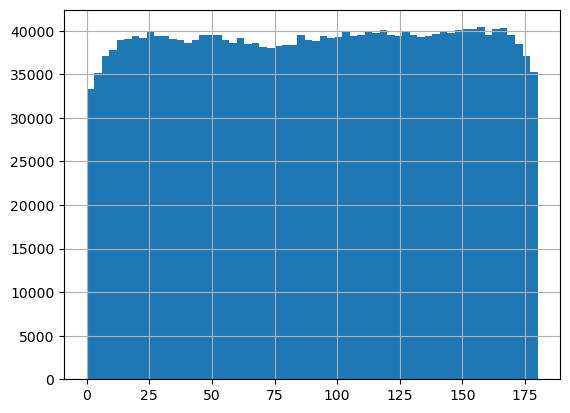

In [19]:
df.avg_wind_alignment.hist(bins=60)

<AxesSubplot: >

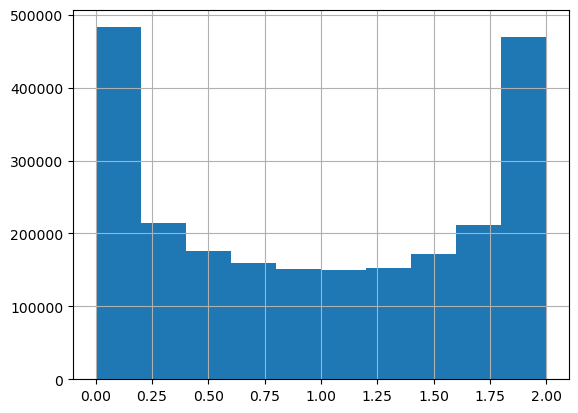

In [20]:
df.avg_wind_alignment_cosine.hist()

In [20]:
df.columns

Index(['year', 'cdscode', 'school_county', 'school_zip', 'school_open_date',
       'school_closed_date', 'school_lat', 'school_lon', 'school_wspd',
       'school_elevation_m', 'year_month', 'total_population',
       'total_population_male', 'total_population_female', 'population_0_4',
       'population_0_4_male', 'population_0_4_female', 'population_5_9',
       'population_5_9_male', 'population_5_9_female', 'population_10_14',
       'population_10_14_male', 'population_10_14_female', 'population_15_19',
       'population_15_19_male', 'population_15_19_female', 'pop_under19_male',
       'pop_under19_female', 'total_pop_under19', 'pm25', 'point_source_lat',
       'point_source_lon', 'ps_elevation_m', 'point_source_pm25_tpy',
       'dist_school_to_ps_m', 'angle_to_school', 'ps_wind_lat', 'ps_wind_lon',
       'ps_wspd_merge', 'school_wdir_wrt_0N', 'ps_wdir_wrt_0N',
       'school_wind_alignment', 'ps_wind_alignment', 'avg_wind_speed',
       'avg_wind_alignment', 'avg_wind_alig

In [21]:
df.head(3)

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid,tax_per_capita
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.26603,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,2888.0,7.736047,37.1056,-120.2487,73.3,2.012773,1873.525780,-55.296440,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1,121.890698
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.26603,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,2888.0,7.736047,37.1056,-120.2487,73.3,2.012773,1873.525780,-55.296440,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1,121.890698
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.26487,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,2888.0,7.736047,37.1056,-120.2487,73.3,2.012773,2358.382419,-37.540285,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1,121.890698


In [22]:
df.isna().sum()

year                              0
cdscode                           0
school_county                     0
school_zip                        0
school_open_date                  0
school_closed_date                0
school_lat                        0
school_lon                        0
school_wspd                       0
school_elevation_m                0
year_month                        0
total_population                  0
total_population_male             0
total_population_female           0
population_0_4                    0
population_0_4_male               0
population_0_4_female             0
population_5_9                    0
population_5_9_male               0
population_5_9_female             0
population_10_14                  0
population_10_14_male             0
population_10_14_female           0
population_15_19                  0
population_15_19_male             0
population_15_19_female           0
pop_under19_male                  0
pop_under19_female          

In [21]:
min(df.year_month)

Timestamp('2000-01-01 00:00:00')

In [22]:
max(df.year_month)

Timestamp('2018-12-01 00:00:00')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338291 entries, 0 to 2983110
Data columns (total 57 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   year                       float64       
 1   cdscode                    int64         
 2   school_county              object        
 3   school_zip                 int32         
 4   school_open_date           datetime64[ns]
 5   school_closed_date         datetime64[ns]
 6   school_lat                 float64       
 7   school_lon                 float64       
 8   school_wspd                float64       
 9   school_elevation_m         float64       
 10  year_month                 datetime64[ns]
 11  total_population           float64       
 12  total_population_male      float64       
 13  total_population_female    float64       
 14  population_0_4             float64       
 15  population_0_4_male        float64       
 16  population_0_4_female      float64  

# Aggregate data to zip/month level

Check row counts before we do a group by. Want everything on a year-month-zip basis. Some variables are already on this year-month-zip basis, others are not. Group by the vars that are on this year-month-zip basis, then average the others that aren't to fit this grouping.

In [24]:
n = df[['year_month', 'school_zip']].drop_duplicates().shape[0]
print(f'count of distinct year-mo-zips: {n}')

# including the population counts in this
n = df[['year_month', 'school_zip', 'school_county_v2', 'school_region_name',
  'pop_under19_male', 'pop_under19_female', 'total_pop_under19', 'pm25', 
  'CA_AGI_per_returns', 'Total Tax Liability']]\
  .drop_duplicates().shape[0]
print(f'count of distinct for all join vars: {n}')

count of distinct year-mo-zips: 312789
count of distinct for all join vars: 312789


In [25]:
# maybe not all of these should use 'mean', but doing it this way for now. 
mean_vars = ['school_wspd', 'ps_wspd_merge', 'avg_wind_speed',
 'school_elevation_m', 'ps_elevation_m', 
 'point_source_pm25_tpy', 'dist_school_to_ps_m', 'angle_to_school', 'nearby_point_source_count',
 'school_wdir_wrt_0N', 'ps_wdir_wrt_0N', 'school_wind_alignment', 'ps_wind_alignment',
 'CA_AGI_per_returns', 'Total Tax Liability', 'tax_per_capita',
 'total_population', 'total_population_male', 'total_population_female',
 'population_0_4', 'population_0_4_male', 'population_0_4_female',
 'population_5_9', 'population_5_9_male', 'population_5_9_female',
 'population_10_14', 'population_10_14_male', 'population_10_14_female',
 'population_15_19', 'population_15_19_male', 'population_15_19_female',
 'total_pop_under19', 'pop_under19_male', 'pop_under19_female',
 'avg_wind_alignment', 'avg_wind_alignment_cosine']

count_vars = ['cdscode']

mean_dict = {var:(var, 'mean') for var in mean_vars}
count_dict = {var:(var, 'count') for var in count_vars}

agg_dict = {**mean_dict, **count_dict}

grp_vars = ['year_month', 'school_zip', 'school_county_v2', 'school_region_name', 'pm25', 'year']
# 'total_pop_under19'

df_grp = df\
  .groupby(grp_vars)\
  .agg(**agg_dict)\
  .reset_index()

df_grp.rename(columns= {'cdscode': 'school_count'}, inplace=True)

print(f'Num rows of grouped df: {df_grp.shape[0]}')

Num rows of grouped df: 312789


In [26]:
df_grp.head()

,year_month,school_zip,school_county_v2,school_region_name,pm25,year,school_wspd,ps_wspd_merge,avg_wind_speed,school_elevation_m,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,nearby_point_source_count,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,CA_AGI_per_returns,Total Tax Liability,tax_per_capita,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,total_pop_under19,pop_under19_male,pop_under19_female,avg_wind_alignment,avg_wind_alignment_cosine,school_count
0,2000-01-01,90001,Los Angeles,Los Angeles County,32.149998,2000.0,0.757031,0.757031,0.757031,44.728889,43.703333,14.241154,3854.812685,-90.196586,0.000000,-172.758321,-172.758321,82.561735,82.561735,20049.704556,2608176.0,47.873130,54481.0,27320.0,27161.0,6196.0,3209.0,2987.0,6672.0,3397.0,3275.0,5562.0,2850.0,2712.0,5075.0,2599.0,2476.0,11450.0,12055.0,11450.0,82.561735,1.124995,9
1,2000-01-01,90002,Los Angeles,Los Angeles County,31.849998,2000.0,0.757031,0.757031,0.757031,33.858889,29.690000,6.649500,2734.278190,-75.730039,0.222222,-172.758321,-172.758321,97.028283,97.028283,19697.001063,1549733.0,34.759847,44584.0,21553.0,23031.0,4795.0,2447.0,2348.0,5655.0,2870.0,2785.0,5077.0,2566.0,2511.0,4316.0,2179.0,2137.0,9781.0,10062.0,9781.0,97.028283,0.879819,9
2,2000-01-01,90003,Los Angeles,Los Angeles County,31.724998,2000.0,0.757031,0.855611,0.806321,42.329167,45.785000,11.672797,5281.522927,-63.495073,0.000000,-172.758321,-60.057878,106.478652,100.850655,18895.491452,2255523.0,38.763349,58187.0,28557.0,29630.0,6527.0,3297.0,3230.0,6894.0,3539.0,3355.0,5994.0,3000.0,2994.0,5381.0,2727.0,2654.0,12233.0,12563.0,12233.0,103.664653,0.869845,12
3,2000-01-01,90004,Los Angeles,Los Angeles County,29.560000,2000.0,0.757031,0.757031,0.757031,83.190000,102.906667,5.158316,6452.615217,-87.100171,0.000000,-172.758321,-172.758321,78.897449,78.897449,41990.032278,44046571.0,649.175696,67850.0,34200.0,33650.0,5621.0,2879.0,2742.0,5505.0,2816.0,2689.0,4470.0,2297.0,2173.0,4204.0,2199.0,2005.0,9609.0,10191.0,9609.0,78.897449,1.160977,9
4,2000-01-01,90006,Los Angeles,Los Angeles County,30.750000,2000.0,0.757031,0.757031,0.757031,65.920000,77.570000,3.553121,5187.184865,-78.360123,0.000000,-172.758321,-172.758321,94.398199,94.398199,17629.297337,3132557.0,49.909297,62765.0,31901.0,30864.0,5939.0,3050.0,2889.0,6009.0,2995.0,3014.0,4493.0,2337.0,2156.0,4416.0,2370.0,2046.0,10105.0,10752.0,10105.0,94.398199,0.923498,5


In [27]:
df_grp.isna().sum()

year_month                    0
school_zip                    0
school_county_v2              0
school_region_name            0
pm25                          0
year                          0
school_wspd                   0
ps_wspd_merge                 0
avg_wind_speed                0
school_elevation_m            0
ps_elevation_m                0
point_source_pm25_tpy         0
dist_school_to_ps_m           0
angle_to_school               0
nearby_point_source_count     0
school_wdir_wrt_0N            0
ps_wdir_wrt_0N                0
school_wind_alignment         0
ps_wind_alignment             0
CA_AGI_per_returns            0
Total Tax Liability           0
tax_per_capita               24
total_population              0
total_population_male         0
total_population_female       0
population_0_4                0
population_0_4_male           0
population_0_4_female         0
population_5_9                0
population_5_9_male           0
population_5_9_female         0
populati

In [45]:
df_grp = df_grp[df_grp['tax_per_capita'].notna()]

In [46]:
df_grp.isna().sum()

year_month                   0
school_zip                   0
school_county_v2             0
school_region_name           0
pm25                         0
year                         0
school_wspd                  0
ps_wspd_merge                0
avg_wind_speed               0
school_elevation_m           0
ps_elevation_m               0
point_source_pm25_tpy        0
dist_school_to_ps_m          0
angle_to_school              0
nearby_point_source_count    0
school_wdir_wrt_0N           0
ps_wdir_wrt_0N               0
school_wind_alignment        0
ps_wind_alignment            0
CA_AGI_per_returns           0
Total Tax Liability          0
tax_per_capita               0
total_population             0
total_population_male        0
total_population_female      0
population_0_4               0
population_0_4_male          0
population_0_4_female        0
population_5_9               0
population_5_9_male          0
population_5_9_female        0
population_10_14             0
populati

In [48]:
df_grp.tax_per_capita.describe()

count    3.127650e+05
mean              inf
std               NaN
min      8.182159e-02
25%      3.363136e+02
50%      6.832298e+02
75%      1.474236e+03
max               inf
Name: tax_per_capita, dtype: float64

In [49]:
df_grp.columns

Index(['year_month', 'school_zip', 'school_county_v2', 'school_region_name',
       'pm25', 'year', 'school_wspd', 'ps_wspd_merge', 'avg_wind_speed',
       'school_elevation_m', 'ps_elevation_m', 'point_source_pm25_tpy',
       'dist_school_to_ps_m', 'angle_to_school', 'nearby_point_source_count',
       'school_wdir_wrt_0N', 'ps_wdir_wrt_0N', 'school_wind_alignment',
       'ps_wind_alignment', 'CA_AGI_per_returns', 'Total Tax Liability',
       'tax_per_capita', 'total_population', 'total_population_male',
       'total_population_female', 'population_0_4', 'population_0_4_male',
       'population_0_4_female', 'population_5_9', 'population_5_9_male',
       'population_5_9_female', 'population_10_14', 'population_10_14_male',
       'population_10_14_female', 'population_15_19', 'population_15_19_male',
       'population_15_19_female', 'total_pop_under19', 'pop_under19_male',
       'pop_under19_female', 'avg_wind_alignment', 'avg_wind_alignment_cosine',
       'school_count'],
  

In [50]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312765 entries, 0 to 312788
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   year_month                 312765 non-null  datetime64[ns]
 1   school_zip                 312765 non-null  int64         
 2   school_county_v2           312765 non-null  object        
 3   school_region_name         312765 non-null  object        
 4   pm25                       312765 non-null  float64       
 5   year                       312765 non-null  float64       
 6   school_wspd                312765 non-null  float64       
 7   ps_wspd_merge              312765 non-null  float64       
 8   avg_wind_speed             312765 non-null  float64       
 9   school_elevation_m         312765 non-null  float64       
 10  ps_elevation_m             312765 non-null  float64       
 11  point_source_pm25_tpy      312765 non-null  float64 

## One hot encode school region name

In [51]:
df_grp_2 = pd.get_dummies(df_grp, columns=['school_region_name'], drop_first=False)

df_grp_2

,year_month,school_zip,school_county_v2,pm25,year,school_wspd,ps_wspd_merge,avg_wind_speed,school_elevation_m,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,nearby_point_source_count,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,CA_AGI_per_returns,Total Tax Liability,tax_per_capita,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,total_pop_under19,pop_under19_male,pop_under19_female,avg_wind_alignment,avg_wind_alignment_cosine,school_count,school_region_name_Central Coast,school_region_name_Inland Empire,school_region_name_Los Angeles County,school_region_name_North Coast,school_region_name_Northern San Joaquin Valley,school_region_name_Orange County,school_region_name_San Diego - Imperial,school_region_name_San Francisco Bay Area,school_region_name_Southern San Joaquin Valley,school_region_name_Superior California
0,2000-01-01,90001,Los Angeles,32.149998,2000.0,0.757031,0.757031,0.757031,44.728889,43.703333,14.241154,3854.812685,-90.196586,0.000000,-172.758321,-172.758321,82.561735,82.561735,20049.704556,2.608176e+06,47.873130,54481.0,27320.0,27161.0,6196.0,3209.0,2987.0,6672.0,3397.0,3275.0,5562.0,2850.0,2712.0,5075.0,2599.0,2476.0,11450.0,12055.0,11450.0,82.561735,1.124995,9,0,0,1,0,0,0,0,0,0,0
1,2000-01-01,90002,Los Angeles,31.849998,2000.0,0.757031,0.757031,0.757031,33.858889,29.690000,6.649500,2734.278190,-75.730039,0.222222,-172.758321,-172.758321,97.028283,97.028283,19697.001063,1.549733e+06,34.759847,44584.0,21553.0,23031.0,4795.0,2447.0,2348.0,5655.0,2870.0,2785.0,5077.0,2566.0,2511.0,4316.0,2179.0,2137.0,9781.0,10062.0,9781.0,97.028283,0.879819,9,0,0,1,0,0,0,0,0,0,0
2,2000-01-01,90003,Los Angeles,31.724998,2000.0,0.757031,0.855611,0.806321,42.329167,45.785000,11.672797,5281.522927,-63.495073,0.000000,-172.758321,-60.057878,106.478652,100.850655,18895.491452,2.255523e+06,38.763349,58187.0,28557.0,29630.0,6527.0,3297.0,3230.0,6894.0,3539.0,3355.0,5994.0,3000.0,2994.0,5381.0,2727.0,2654.0,12233.0,12563.0,12233.0,103.664653,0.869845,12,0,0,1,0,0,0,0,0,0,0
3,2000-01-01,90004,Los Angeles,29.560000,2000.0,0.757031,0.757031,0.757031,83.190000,102.906667,5.158316,6452.615217,-87.100171,0.000000,-172.758321,-172.758321,78.897449,78.897449,41990.032278,4.404657e+07,649.175696,67850.0,34200.0,33650.0,5621.0,2879.0,2742.0,5505.0,2816.0,2689.0,4470.0,2297.0,2173.0,4204.0,2199.0,2005.0,9609.0,10191.0,9609.0,78.897449,1.160977,9,0,0,1,0,0,0,0,0,0,0
4,2000-01-01,90006,Los Angeles,30.750000,2000.0,0.757031,0.757031,0.757031,65.920000,77.570000,3.553121,5187.184865,-78.360123,0.000000,-172.758321,-172.758321,94.398199,94.398199,17629.297337,3.132557e+06,49.909297,62765.0,31901.0,30864.0,5939.0,3050.0,2889.0,6009.0,2995.0,3014.0,4493.0,2337.0,2156.0,4416.0,2370.0,2046.0,10105.0,10752.0,10105.0,94.398199,0.923498,5,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312784,2018-12-01,96145,Placer,4.462162,2018.0,0.437017,0.243283,0.340150,1991.700000,1797.860000,1.693826,14639.964232,55.979727,0.000000,13.414409,-61.071359,162.565317,122.948914,84420.345595,1.108245e+07,5152.233380,2151.0,1130.0,1021.0,109.0,63.0,46.0,79.0,63.0,16.0,114.0,36.0,78.0,48.0,17.0,31.0,171.0,179.0,171.0,142.757116,0.203923,3,0,0,0,0,0,0,0,0,0,1
312785,2018-12-01,96146,Placer,4.626316,2018.0,0.437017,0.243283,0.340150,1895.970000,1797.860000,1.693826,15987.398121,-147.155701,0.000000,13.414409,-61.071359,160.570111,86.084342,113113.030726,6.148855e+06,6345.567595,969.0,562.0,407.0,36.0,21.0,15.0,59.0,21.0,38.0,32.0,9.0,23.0,20.0,20.0,0.0,76.0,71.0,76.0,123.327226,0.450580,1,0,0,0,0

In [52]:
df_grp_2['month'] = df_grp_2['year_month'].dt.month.map(lambda x: str(x).rjust(2, '0'))

df_grp_2.head(3)

,year_month,school_zip,school_county_v2,pm25,year,school_wspd,ps_wspd_merge,avg_wind_speed,school_elevation_m,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,nearby_point_source_count,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,CA_AGI_per_returns,Total Tax Liability,tax_per_capita,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,total_pop_under19,pop_under19_male,pop_under19_female,avg_wind_alignment,avg_wind_alignment_cosine,school_count,school_region_name_Central Coast,school_region_name_Inland Empire,school_region_name_Los Angeles County,school_region_name_North Coast,school_region_name_Northern San Joaquin Valley,school_region_name_Orange County,school_region_name_San Diego - Imperial,school_region_name_San Francisco Bay Area,school_region_name_Southern San Joaquin Valley,school_region_name_Superior California,month
0,2000-01-01,90001,Los Angeles,32.149998,2000.0,0.757031,0.757031,0.757031,44.728889,43.703333,14.241154,3854.812685,-90.196586,0.000000,-172.758321,-172.758321,82.561735,82.561735,20049.704556,2608176.0,47.873130,54481.0,27320.0,27161.0,6196.0,3209.0,2987.0,6672.0,3397.0,3275.0,5562.0,2850.0,2712.0,5075.0,2599.0,2476.0,11450.0,12055.0,11450.0,82.561735,1.124995,9,0,0,1,0,0,0,0,0,0,0,01
1,2000-01-01,90002,Los Angeles,31.849998,2000.0,0.757031,0.757031,0.757031,33.858889,29.690000,6.649500,2734.278190,-75.730039,0.222222,-172.758321,-172.758321,97.028283,97.028283,19697.001063,1549733.0,34.759847,44584.0,21553.0,23031.0,4795.0,2447.0,2348.0,5655.0,2870.0,2785.0,5077.0,2566.0,2511.0,4316.0,2179.0,2137.0,9781.0,10062.0,9781.0,97.028283,0.879819,9,0,0,1,0,0,0,0,0,0,0,01
2,2000-01-01,90003,Los Angeles,31.724998,2000.0,0.757031,0.855611,0.806321,42.329167,45.785000,11.672797,5281.522927,-63.495073,0.000000,-172.758321,-60.057878,106.478652,100.850655,18895.491452,2255523.0,38.763349,58187.0,28557.0,29630.0,6527.0,3297.0,3230.0,6894.0,3539.0,3355.0,5994.0,3000.0,2994.0,5381.0,2727.0,2654.0,12233.0,12563.0,12233.0,103.664653,0.869845,12,0,0,1,0,0,0,0,0,0,0,01


In [53]:
df_grp_2 = pd.get_dummies(df_grp_2, columns=['month'], drop_first=False)

In [54]:
df_grp_2

,year_month,school_zip,school_county_v2,pm25,year,school_wspd,ps_wspd_merge,avg_wind_speed,school_elevation_m,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,nearby_point_source_count,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,CA_AGI_per_returns,Total Tax Liability,tax_per_capita,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,total_pop_under19,pop_under19_male,pop_under19_female,avg_wind_alignment,avg_wind_alignment_cosine,school_count,school_region_name_Central Coast,school_region_name_Inland Empire,school_region_name_Los Angeles County,school_region_name_North Coast,school_region_name_Northern San Joaquin Valley,school_region_name_Orange County,school_region_name_San Diego - Imperial,school_region_name_San Francisco Bay Area,school_region_name_Southern San Joaquin Valley,school_region_name_Superior California,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,2000-01-01,90001,Los Angeles,32.149998,2000.0,0.757031,0.757031,0.757031,44.728889,43.703333,14.241154,3854.812685,-90.196586,0.000000,-172.758321,-172.758321,82.561735,82.561735,20049.704556,2.608176e+06,47.873130,54481.0,27320.0,27161.0,6196.0,3209.0,2987.0,6672.0,3397.0,3275.0,5562.0,2850.0,2712.0,5075.0,2599.0,2476.0,11450.0,12055.0,11450.0,82.561735,1.124995,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2000-01-01,90002,Los Angeles,31.849998,2000.0,0.757031,0.757031,0.757031,33.858889,29.690000,6.649500,2734.278190,-75.730039,0.222222,-172.758321,-172.758321,97.028283,97.028283,19697.001063,1.549733e+06,34.759847,44584.0,21553.0,23031.0,4795.0,2447.0,2348.0,5655.0,2870.0,2785.0,5077.0,2566.0,2511.0,4316.0,2179.0,2137.0,9781.0,10062.0,9781.0,97.028283,0.879819,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2000-01-01,90003,Los Angeles,31.724998,2000.0,0.757031,0.855611,0.806321,42.329167,45.785000,11.672797,5281.522927,-63.495073,0.000000,-172.758321,-60.057878,106.478652,100.850655,18895.491452,2.255523e+06,38.763349,58187.0,28557.0,29630.0,6527.0,3297.0,3230.0,6894.0,3539.0,3355.0,5994.0,3000.0,2994.0,5381.0,2727.0,2654.0,12233.0,12563.0,12233.0,103.664653,0.869845,12,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2000-01-01,90004,Los Angeles,29.560000,2000.0,0.757031,0.757031,0.757031,83.190000,102.906667,5.158316,6452.615217,-87.100171,0.000000,-172.758321,-172.758321,78.897449,78.897449,41990.032278,4.404657e+07,649.175696,67850.0,34200.0,33650.0,5621.0,2879.0,2742.0,5505.0,2816.0,2689.0,4470.0,2297.0,2173.0,4204.0,2199.0,2005.0,9609.0,10191.0,9609.0,78.897449,1.160977,9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2000-01-01,90006,Los Angeles,30.750000,2000.0,0.757031,0.757031,0.757031,65.920000,77.570000,3.553121,5187.184865,-78.360123,0.000000,-172.758321,-172.758321,94.398199,94.398199,17629.297337,3.132557e+06,49.909297,62765.0,31901.0,30864.0,5939.0,3050.0,2889.0,6009.0,2995.0,3014.0,4493.0,2337.0,2156.0,4416.0,2370.0,2046.0,10105.0,10752.0,10105.0,94.398199,0.923498,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312784,2018-12-01,96145,Placer,4.462162,2018.0,0.437017,0.243283,0.340150,1991.700000,1797.860000,1.693826,14639.964232,55.979727,0.000000,13.414409,-61.071359,162.565317,122.948914,84420.345595,1.108245e+07,5152.233380,2151.0,1130.0,1021.0,109.0,63.0,46.0,79.0,63.0,16.0,114.0,36.0,78.0,48.0,17.0,31.0,171.0,179.0,171.0,142.757116,0.203923,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
312785,2018-12-01,96146,Placer,4.626316,20

In [55]:
df_grp_2.total_population.describe()

count    312765.000000
mean      24978.133510
std       21498.395122
min           0.000000
25%        4414.000000
50%       22350.000000
75%       38790.000000
max      109414.000000
Name: total_population, dtype: float64

In [56]:
df_grp_2.tax_per_capita.describe()

count    3.127650e+05
mean              inf
std               NaN
min      8.182159e-02
25%      3.363136e+02
50%      6.832298e+02
75%      1.474236e+03
max               inf
Name: tax_per_capita, dtype: float64

In [60]:
# check NA
df_grp_2.isna().sum()

year_month          0
school_zip          0
school_county_v2    0
pm25                0
year                0
                   ..
month_08            0
month_09            0
month_10            0
month_11            0
month_12            0
Length: 64, dtype: int64

<AxesSubplot: >

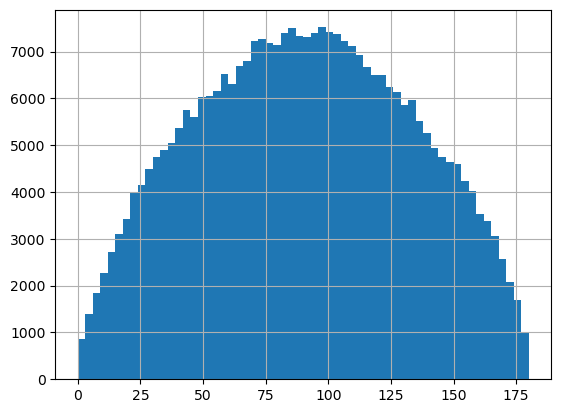

In [57]:
df_grp_2.avg_wind_alignment.hist(bins=60)


<AxesSubplot: >

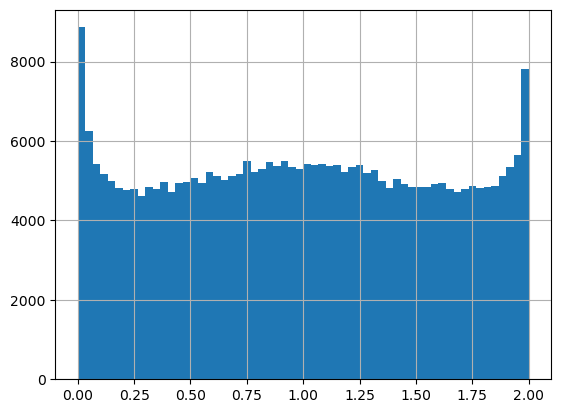

In [56]:
df_grp_2.avg_wind_alignment_cosine.hist(bins=60)


In [61]:
df_grp_2.shape

(312765, 64)

In [62]:
df_grp_2.columns

Index(['year_month', 'school_zip', 'school_county_v2', 'pm25', 'year',
       'school_wspd', 'ps_wspd_merge', 'avg_wind_speed', 'school_elevation_m',
       'ps_elevation_m', 'point_source_pm25_tpy', 'dist_school_to_ps_m',
       'angle_to_school', 'nearby_point_source_count', 'school_wdir_wrt_0N',
       'ps_wdir_wrt_0N', 'school_wind_alignment', 'ps_wind_alignment',
       'CA_AGI_per_returns', 'Total Tax Liability', 'tax_per_capita',
       'total_population', 'total_population_male', 'total_population_female',
       'population_0_4', 'population_0_4_male', 'population_0_4_female',
       'population_5_9', 'population_5_9_male', 'population_5_9_female',
       'population_10_14', 'population_10_14_male', 'population_10_14_female',
       'population_15_19', 'population_15_19_male', 'population_15_19_female',
       'total_pop_under19', 'pop_under19_male', 'pop_under19_female',
       'avg_wind_alignment', 'avg_wind_alignment_cosine', 'school_count',
       'school_region_name_Centr

## Try to Making Rolling Beta Column

In [121]:
from sklearn import linear_model

In [122]:
regr = linear_model.LinearRegression()

In [136]:
# temp data for x, y
y_temp = np.array([11.5, 12.5, 13.5, 14.5, 15.5, 45.5])
x_temp = np.array(list(range(len(y_temp)))).reshape(-1, 1)

In [137]:
regr.fit(x_temp, y_temp)

LinearRegression()

In [138]:
print("Coefficients: \n", regr.coef_[0])

Coefficients: 
 5.142857142857143


In [158]:
# create a df rolling avg
df_avgs = df_grp[['year_month', 'school_zip', 'pm25']].sort_values(['school_zip', 'year_month'])

# get rolling n month avg
def create_rolling_avg(df, num_months=6):
  df[f'pm25_r{num_months}'] = df.groupby('school_zip')['pm25']\
    .apply(lambda x: x.rolling(window=num_months, min_periods=num_months, closed='left').mean())
    
  return df 


df_avgs = create_rolling_avg(df_avgs, 1)
df_avgs = create_rolling_avg(df_avgs, 6)
df_avgs = create_rolling_avg(df_avgs, 9)
df_avgs = create_rolling_avg(df_avgs, 12)
df_avgs = create_rolling_avg(df_avgs, 24)

# df_avgs = get_slope_pm25_per_month(df_avgs, 6)

# count num obs over past n months (don't need this, but keeping it commented just in case)
# df_avgs['pm25_6mo_count'] = df_avgs.groupby('school_zip')['pm25'].apply(lambda x: x.rolling(6, 1, closed='left').apply(lambda x: len(x)))
# df_avgs['pm25_9mo_count'] = df_avgs.groupby('school_zip')['pm25'].apply(lambda x: x.rolling(9, 1, closed='left').apply(lambda x: len(x)))
# df_avgs['pm25_12mo_count'] = df_avgs.groupby('school_zip')['pm25'].apply(lambda x: x.rolling(12, 1, closed='left').apply(lambda x: len(x)))

# get pm25 for last month
df_avgs = df_avgs.rename(columns={'pm25_r1': 'pm25_last_month'})

C:\Users\anandadmin\AppData\Local\Temp\ipykernel_37708\4085604795.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x.rolling(window=num_months, min_periods=num_months, closed='left').mean())
C:\Users\anandadmin\AppData\Local\Temp\ipykernel_37708\4085604795.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> 

In [159]:
df_avgs.head(25)

,year_month,school_zip,pm25,pm25_last_month,pm25_r6,pm25_r9,pm25_r12,pm25_r24
0,2000-01-01,90001,32.149998,NaN,NaN,NaN,NaN,NaN
1359,2000-02-01,90001,13.666667,32.149998,NaN,NaN,NaN,NaN
2718,2000-03-01,90001,17.183334,13.666667,NaN,NaN,NaN,NaN
4077,2000-04-01,90001,17.366667,17.183334,NaN,NaN,NaN,NaN
5436,2000-05-01,90001,17.616667,17.366667,NaN,NaN,NaN,NaN
6796,2000-06-01,90001,16.883333,17.616667,NaN,NaN,NaN,NaN
8156,2000-07-01,90001,18.850000,16.883333,19.144444,NaN,NaN,NaN
9517,2000-08-01,90001,18.833332,18.850000,16.927778,NaN,NaN,NaN
10878,2000-09-01,90001,17.766666,18.833332,17.788889,NaN,NaN,NaN
12239,2000-10-01,90001,23.466667,17.766666,17.886111,18.924074,NaN,NaN


In [162]:
def get_slope_pm25_per_month(df, num_months=6):
    def calcSlope(y):
        regr = linear_model.LinearRegression()
        x_temp = np.array(list(range(len(y)))).reshape(-1, 1)

        try:
            regr.fit(x_temp, y)
            return regr.coef_[0]
        except:
            return None
    
    df[f'pm25_slope{num_months}'] = df.groupby('school_zip')['pm25']\
    .apply(lambda x: x.rolling(window=num_months, min_periods=num_months, closed='left').apply(lambda y: calcSlope(y)))

    return df

In [163]:
df_avgs = get_slope_pm25_per_month(df_avgs, 6)
df_avgs = get_slope_pm25_per_month(df_avgs, 9)
df_avgs = get_slope_pm25_per_month(df_avgs, 12)
df_avgs = get_slope_pm25_per_month(df_avgs, 24)

C:\Users\anandadmin\AppData\Local\Temp\ipykernel_37708\277451800.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x.rolling(window=num_months, min_periods=num_months, closed='left').apply(lambda y: calcSlope(y)))
C:\Users\anandadmin\AppData\Local\Temp\ipykernel_37708\277451800.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence th

In [164]:
df_avgs.head(25)

,year_month,school_zip,pm25,pm25_last_month,pm25_r6,pm25_r9,pm25_r12,pm25_r24,pm25_slope6,pm25_slope9,pm25_slope12,pm25_slope24
0,2000-01-01,90001,32.149998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1359,2000-02-01,90001,13.666667,32.149998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2718,2000-03-01,90001,17.183334,13.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4077,2000-04-01,90001,17.366667,17.183334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5436,2000-05-01,90001,17.616667,17.366667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6796,2000-06-01,90001,16.883333,17.616667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8156,2000-07-01,90001,18.850000,16.883333,19.144444,NaN,NaN,NaN,-1.837143,NaN,NaN,NaN
9517,2000-08-01,90001,18.833332,18.850000,16.927778,NaN,NaN,NaN,0.721905,NaN,NaN,NaN
10878,2000-09-01,90001,17.766666,18.833332,17.788889,NaN,NaN,NaN,0.341904,NaN,NaN,NaN
12239,2000-10-01,90001,23.466667,17.766666,17.886111,18.924074,NaN,NaN,0.217619,-0.653056,NaN,NaN


In [161]:
get_slope_pm25_per_month(df_avgs.head(25), 6)

C:\Users\anandadmin\AppData\Local\Temp\ipykernel_37708\4085604795.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x.rolling(window=num_months, min_periods=num_months, closed='left').apply(lambda y: calcSlope(y)))
C:\Users\anandadmin\AppData\Local\Temp\ipykernel_37708\4085604795.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'pm25_slope{num_months}'] = df.groupby('school

,year_month,school_zip,pm25,pm25_last_month,pm25_r6,pm25_r9,pm25_r12,pm25_r24,pm25_slope6
0,2000-01-01,90001,32.149998,NaN,NaN,NaN,NaN,NaN,NaN
1359,2000-02-01,90001,13.666667,32.149998,NaN,NaN,NaN,NaN,NaN
2718,2000-03-01,90001,17.183334,13.666667,NaN,NaN,NaN,NaN,NaN
4077,2000-04-01,90001,17.366667,17.183334,NaN,NaN,NaN,NaN,NaN
5436,2000-05-01,90001,17.616667,17.366667,NaN,NaN,NaN,NaN,NaN
6796,2000-06-01,90001,16.883333,17.616667,NaN,NaN,NaN,NaN,NaN
8156,2000-07-01,90001,18.850000,16.883333,19.144444,NaN,NaN,NaN,-1.837143
9517,2000-08-01,90001,18.833332,18.850000,16.927778,NaN,NaN,NaN,0.721905
10878,2000-09-01,90001,17.766666,18.833332,17.788889,NaN,NaN,NaN,0.341904
12239,2000-10-01,90001,23.466667,17.766666,17.886111,18.924074,NaN,NaN,0.217619


In [156]:
df_avgs.pm25_slope6.value_counts()

5.142857    304437
Name: pm25_slope6, dtype: int64

# Modeling

## A decision tree with random search



In [112]:
from math import floor


dt = DecisionTreeRegressor(random_state=0)

distributions = dict(max_depth=list(range(8, 21)),
                        min_samples_split=uniform(loc=0.0001, scale=0.01),
                        min_samples_leaf= list( range( int(0.001*df_grp_2.shape[0]), int(0.01*df_grp_2.shape[0]) ) ),
                        max_features=[1, 'sqrt', 'log2'])

clf = RandomizedSearchCV(dt, distributions, random_state=0, refit=True, scoring='neg_root_mean_squared_error', n_jobs=-1, n_iter=1000)

In [111]:
df_grp_2.columns

Index(['year_month', 'school_zip', 'school_county_v2', 'pm25', 'year',
       'school_wspd', 'ps_wspd_merge', 'avg_wind_speed', 'school_elevation_m',
       'ps_elevation_m', 'point_source_pm25_tpy', 'dist_school_to_ps_m',
       'angle_to_school', 'nearby_point_source_count', 'school_wdir_wrt_0N',
       'ps_wdir_wrt_0N', 'school_wind_alignment', 'ps_wind_alignment',
       'CA_AGI_per_returns', 'Total Tax Liability', 'tax_per_capita',
       'total_population', 'total_population_male', 'total_population_female',
       'population_0_4', 'population_0_4_male', 'population_0_4_female',
       'population_5_9', 'population_5_9_male', 'population_5_9_female',
       'population_10_14', 'population_10_14_male', 'population_10_14_female',
       'population_15_19', 'population_15_19_male', 'population_15_19_female',
       'total_pop_under19', 'pop_under19_male', 'pop_under19_female',
       'avg_wind_alignment', 'avg_wind_alignment_cosine', 'school_count',
       'school_region_name_Centr

In [113]:
fixed_effects_cols = ['year',
       'avg_wind_speed', 'school_elevation_m',
       'ps_elevation_m', 'point_source_pm25_tpy', 'dist_school_to_ps_m',
       'nearby_point_source_count', 
       'CA_AGI_per_returns', 'Total Tax Liability', 'school_count',
       ]

pop_cols = ['total_population', 'total_population_female', 
            'population_0_4', 'population_0_4_female', 
            'population_5_9', 'population_5_9_female', 
            'population_10_14', 'population_10_14_female', 
            'total_pop_under19', 'pop_under19_female']

school_region_cols = ['school_region_name_Los Angeles County', 'school_region_name_Central Coast', 'school_region_name_Inland Empire',
                    'school_region_name_North Coast',
                    'school_region_name_Northern San Joaquin Valley',
                    'school_region_name_Orange County',
                    'school_region_name_San Diego - Imperial',
                    'school_region_name_San Francisco Bay Area',
                    'school_region_name_Southern San Joaquin Valley',
                    'school_region_name_Superior California']

month_cols = ['month_01', 'month_02',
            'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08',
            'month_09', 'month_10', 'month_11', 'month_12']

independent_var_cols = ['school_wind_alignment']

x_vars = independent_var_cols + fixed_effects_cols + pop_cols + school_region_cols + month_cols

X = df_grp_2[x_vars]
y = df_grp_2['pm25']


In [114]:
search = clf.fit(X, y)

In [115]:
search.best_params_

{'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 444,
 'min_samples_split': 0.0016205256460879358}

In [116]:
results = pd.DataFrame(search.cv_results_).sort_values('rank_test_score')
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
903,2.145253,0.161909,0.058014,0.005926,16,sqrt,444,0.001621,"{'max_depth': 16, 'max_features': 'sqrt', 'min...",-5.958275,-4.282672,-4.755071,-4.201855,-4.907420,-4.821059,0.629023,1
707,2.187637,0.109756,0.058846,0.004257,16,sqrt,359,0.004221,"{'max_depth': 16, 'max_features': 'sqrt', 'min...",-6.125440,-4.163165,-4.754338,-4.258406,-4.866096,-4.833489,0.700931,2
160,2.324932,0.112864,0.080908,0.010827,18,log2,340,0.000809,"{'max_depth': 18, 'max_features': 'log2', 'min...",-6.125959,-4.349442,-4.806404,-4.192377,-4.824541,-4.859745,0.680172,3
47,2.910194,0.303377,0.074798,0.023372,16,sqrt,336,0.004414,"{'max_depth': 16, 'max_features': 'sqrt', 'min...",-5.959304,-4.553090,-4.941878,-4.135401,-4.878885,-4.893711,0.604828,4
598,1.682805,0.063615,0.056602,0.006052,14,log2,355,0.00591,"{'max_depth': 14, 'max_features': 'log2', 'min...",-6.341956,-4.043938,-4.903800,-4.222318,-4.971325,-4.896668,0.809491,5


In [117]:
search.score(X, y)

-4.490396833305565

In [118]:
r2_val = r2_score(y, search.predict(X))
print(f"R^2 on training: {r2_val}")

R^2 on training: 0.43710537755774226


In [119]:
rms = mean_squared_error(y, search.predict(X), squared=False)
print(f"RMSE on training: {rms}")

RMSE on training: 4.490396833305565


<AxesSubplot: >

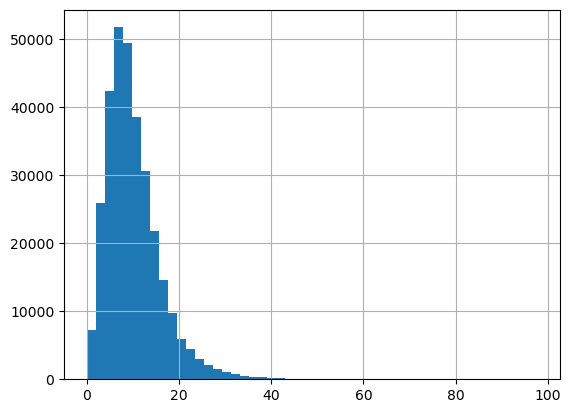

In [99]:
df_grp_2.pm25.hist(bins=50)

<AxesSubplot: >

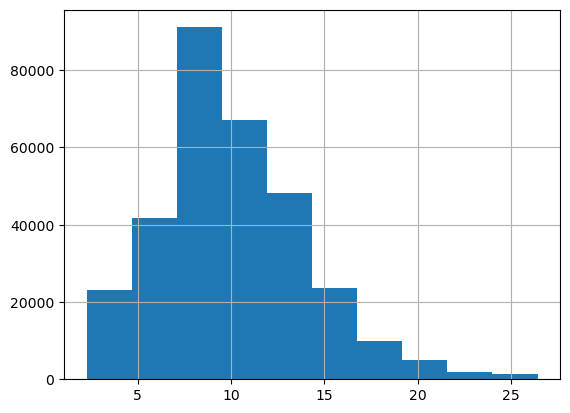

In [120]:
pm25_pred = pd.Series(search.predict(X))
pm25_pred.hist()

## A very baseline linear model

<AxesSubplot: >

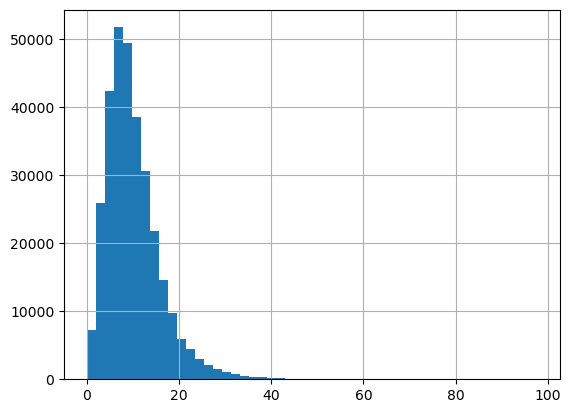

In [37]:
df_grp_2.pm25.hist(bins=50)

In [63]:
df_grp_2['avg_wind_alignment_cosine_squared'] = df_grp_2['avg_wind_alignment_cosine']**2

display(df_grp_2[['avg_wind_alignment_cosine', 'avg_wind_alignment_cosine_squared']])

,avg_wind_alignment_cosine,avg_wind_alignment_cosine_squared
0,1.124995,1.265614
1,0.879819,0.774081
2,0.869845,0.756630
3,1.160977,1.347869
4,0.923498,0.852848
...,...,...
312784,0.203923,0.041585
312785,0.450580,0.203022
312786,1.594435,2.542223
312787,1.677660,2.814542


`modeling_data/modeling_data_2022-10-15.csv`

In [64]:
df_grp_2.columns

Index(['year_month', 'school_zip', 'school_county_v2', 'pm25', 'year',
       'school_wspd', 'ps_wspd_merge', 'avg_wind_speed', 'school_elevation_m',
       'ps_elevation_m', 'point_source_pm25_tpy', 'dist_school_to_ps_m',
       'angle_to_school', 'nearby_point_source_count', 'school_wdir_wrt_0N',
       'ps_wdir_wrt_0N', 'school_wind_alignment', 'ps_wind_alignment',
       'CA_AGI_per_returns', 'Total Tax Liability', 'tax_per_capita',
       'total_population', 'total_population_male', 'total_population_female',
       'population_0_4', 'population_0_4_male', 'population_0_4_female',
       'population_5_9', 'population_5_9_male', 'population_5_9_female',
       'population_10_14', 'population_10_14_male', 'population_10_14_female',
       'population_15_19', 'population_15_19_male', 'population_15_19_female',
       'total_pop_under19', 'pop_under19_male', 'pop_under19_female',
       'avg_wind_alignment', 'avg_wind_alignment_cosine', 'school_count',
       'school_region_name_Centr

In [63]:
df_grp.school_region_name.value_counts()

Los Angeles County             55953
San Francisco Bay Area         46787
Superior California            45539
Southern San Joaquin Valley    28252
Inland Empire                  27759
Northern San Joaquin Valley    25300
Central Coast                  22568
North Coast                    22310
San Diego - Imperial           21739
Orange County                  16582
Name: school_region_name, dtype: int64

In [88]:
fixed_effects_cols = ['year',
       'avg_wind_speed', 'school_elevation_m',
       'ps_elevation_m', 'point_source_pm25_tpy', 'dist_school_to_ps_m',
       'nearby_point_source_count', 
       'CA_AGI_per_returns', 'Total Tax Liability', 'school_count',
       ]

pop_cols = ['total_population', 'total_population_female', 
            'population_0_4', 'population_0_4_female', 
            'population_5_9', 'population_5_9_female', 
            'population_10_14', 'population_10_14_female', 
            'total_pop_under19', 'pop_under19_female']

school_region_cols = ['school_region_name_Central Coast', 'school_region_name_Inland Empire',
                    'school_region_name_North Coast',
                    'school_region_name_Northern San Joaquin Valley',
                    'school_region_name_Orange County',
                    'school_region_name_San Diego - Imperial',
                    'school_region_name_San Francisco Bay Area',
                    'school_region_name_Southern San Joaquin Valley',
                    'school_region_name_Superior California']

month_cols = ['month_02',
            'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08',
            'month_09', 'month_10', 'month_11', 'month_12']

independent_var_cols = ['school_wind_alignment']

x_vars = independent_var_cols + fixed_effects_cols + pop_cols + school_region_cols + month_cols

X = df_grp_2[x_vars]
y = df_grp_2['pm25']

In [89]:
# add constant
X = sm.add_constant(X)

# fit
est = sm.OLS(y, X).fit()

# see summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm25   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     5704.
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:09:02   Log-Likelihood:            -9.1774e+05
No. Observations:              312765   AIC:                         1.836e+06
Df Residuals:                  312724   BIC:                         1.836e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [90]:
# print RMSE
rmse_residuals = np.sqrt(est.mse_resid)
print(rmse_residuals)

4.551241658376756


In [69]:
pm25_pred = est.predict(X)

<AxesSubplot: >

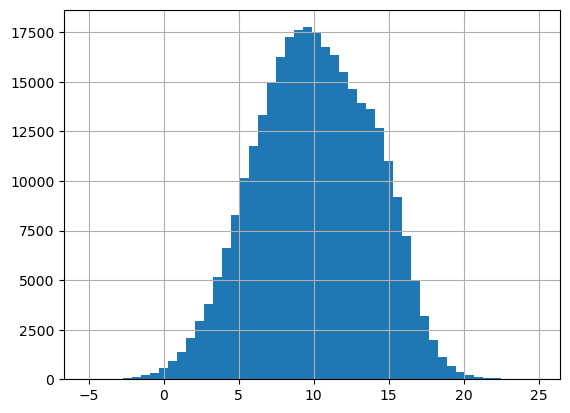

In [70]:
pm25_pred.hist(bins=50)